## K Means Clustering Algorithms Implementation

#### [KMC](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)

In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import  make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [4]:
X,y = make_blobs(n_samples=100, centers=3 , n_features=2, random_state=42)
X

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415],
       [-3.05358035,  9.12520872],
       [-6.65216726, -5.57296684],
       [-6.35768563, -6.58312492],
       [-3.6155326 ,  7.8180795 ],
       [-1.77073104,  9.18565441],
       [-7.95051969, -6.39763718],
       [-6.60293639, -6.05292634],
       [-2.58120774, 10.01781903],
       [-7.76348463, -6.72638449],
       [-6.40638957, -6.95293851],
       [-2.97261532,  8.54855637],
       [-6.9567289 , -6.53895762],
       [-7.32614214, -6.0237108 ],
       [-2.14780202, 10.55232269],
       [-2.54502366, 10.57892978],
       [-2.96983639, 10.07140835],
       [ 3.22450809,  1.55252436],
       [-6.25395984, -7.73726715],
       [-7.85430886,

In [5]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

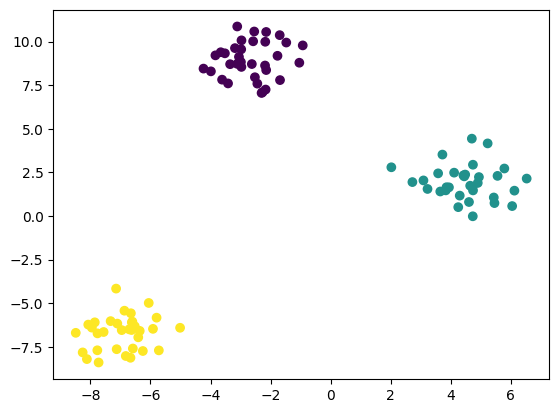

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
from sklearn.model_selection import train_test_split
X_test , X_train , y_test , y_train = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
import multiprocessing

num_cores = multiprocessing.cpu_count()
print(f"You have {num_cores} cores.")

You have 4 cores.


In [10]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set to the number of cores you want to use

In [11]:
from sklearn.cluster import KMeans

wccs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wccs.append(kmeans.inertia_)

wccs

[6474.444504249191,
 3535.886531756412,
 171.91098459057724,
 153.7359457464848,
 132.17765526141653,
 106.7963847994236,
 93.39149778131596,
 81.85150530801798,
 73.11750740042964,
 64.43942964140646]

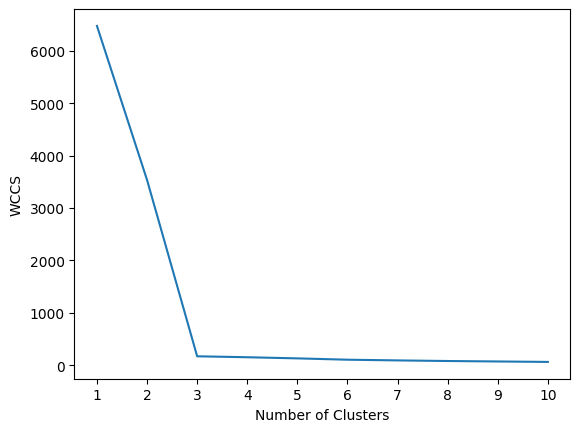

In [13]:
plt.plot(range(1,11),wccs)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCCS")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [15]:
y_labels = kmeans.fit_predict(X_train)

In [16]:
y_labels

array([1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0,
       2, 2, 2, 1, 1, 0, 0, 1])

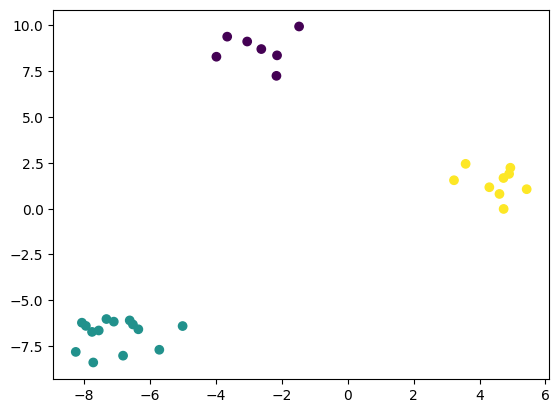

In [18]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [20]:
!pip install kneed

In [22]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11),wccs,curve="convex",direction="decreasing")
k1.elbow

3

In [24]:
## Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_coeffients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coeffients.append(score)
silhouette_coeffients

[0.7357868166189043,
 0.8714820499852897,
 0.6945238595662586,
 0.4540251175388354,
 0.4874473417498686,
 0.45990383825715514,
 0.34243364010325855,
 0.3442434226453663,
 0.3233848720712799]

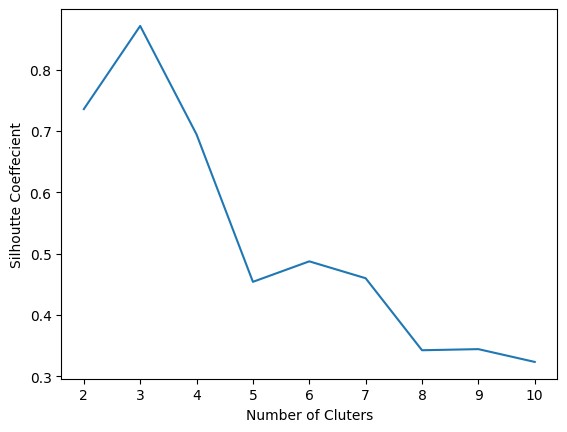

In [26]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coeffients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


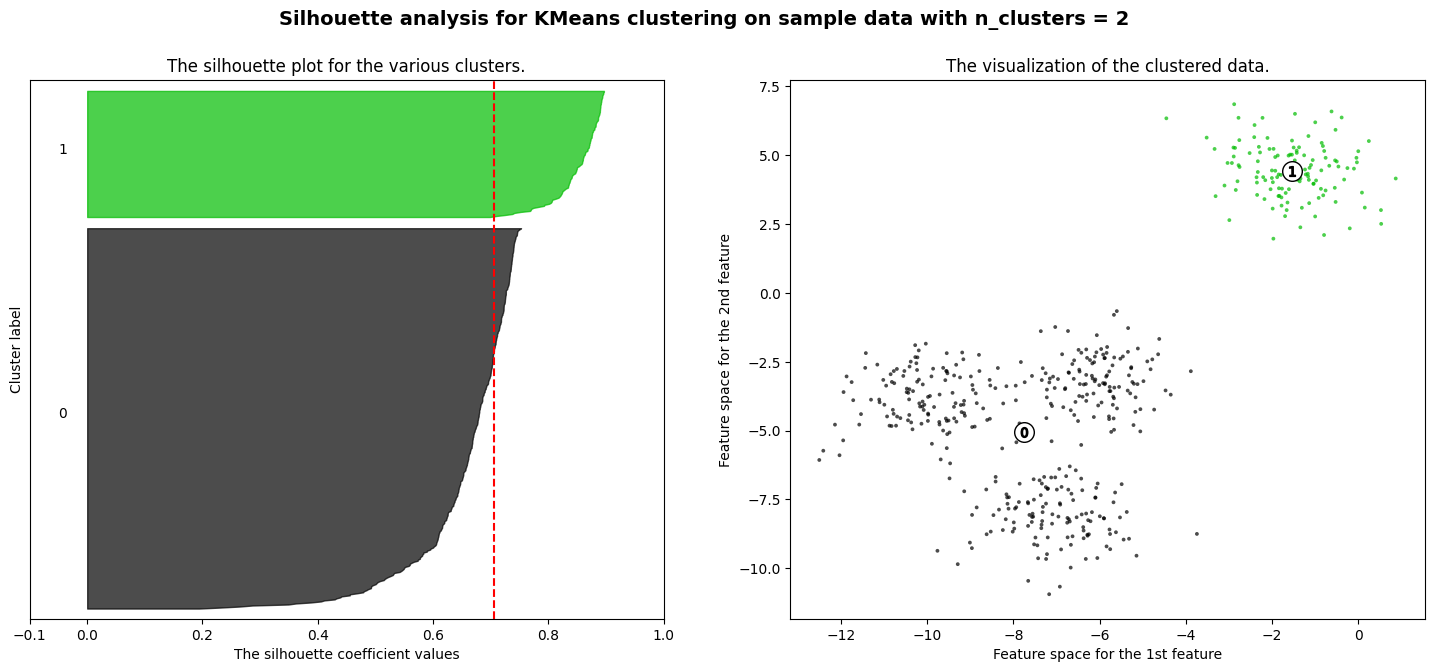

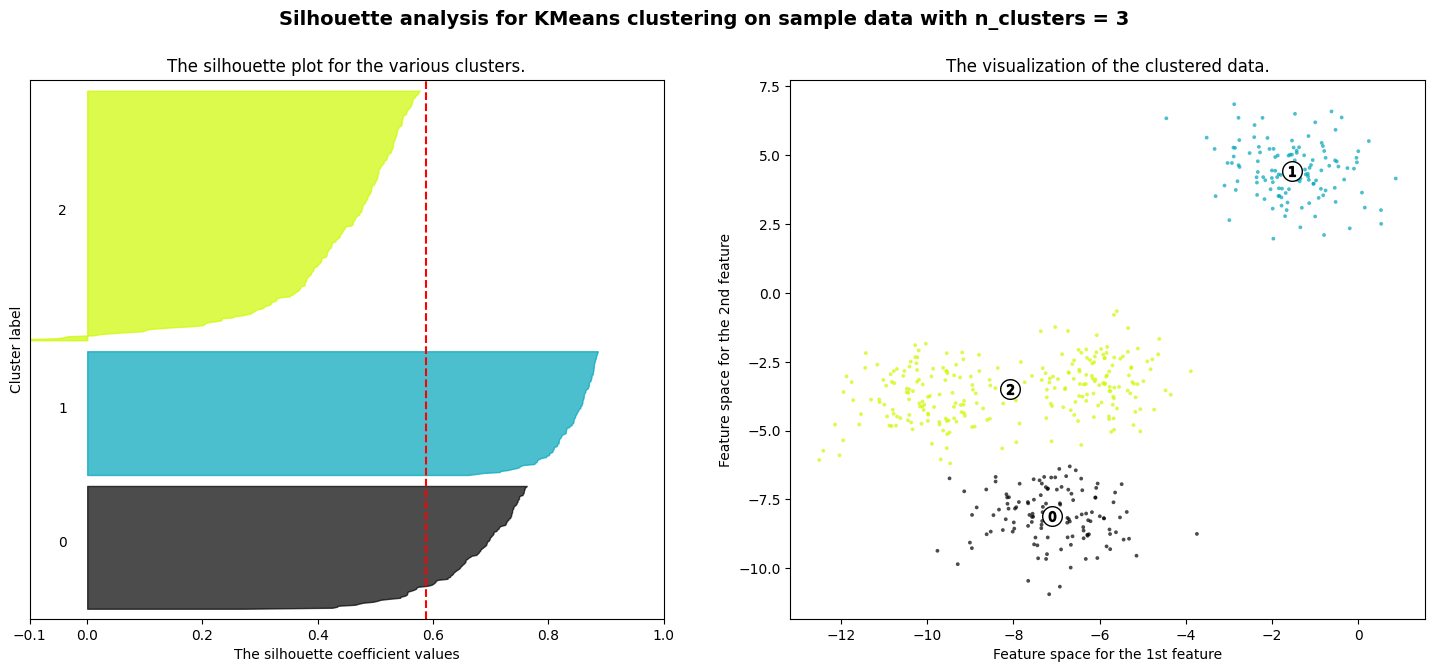

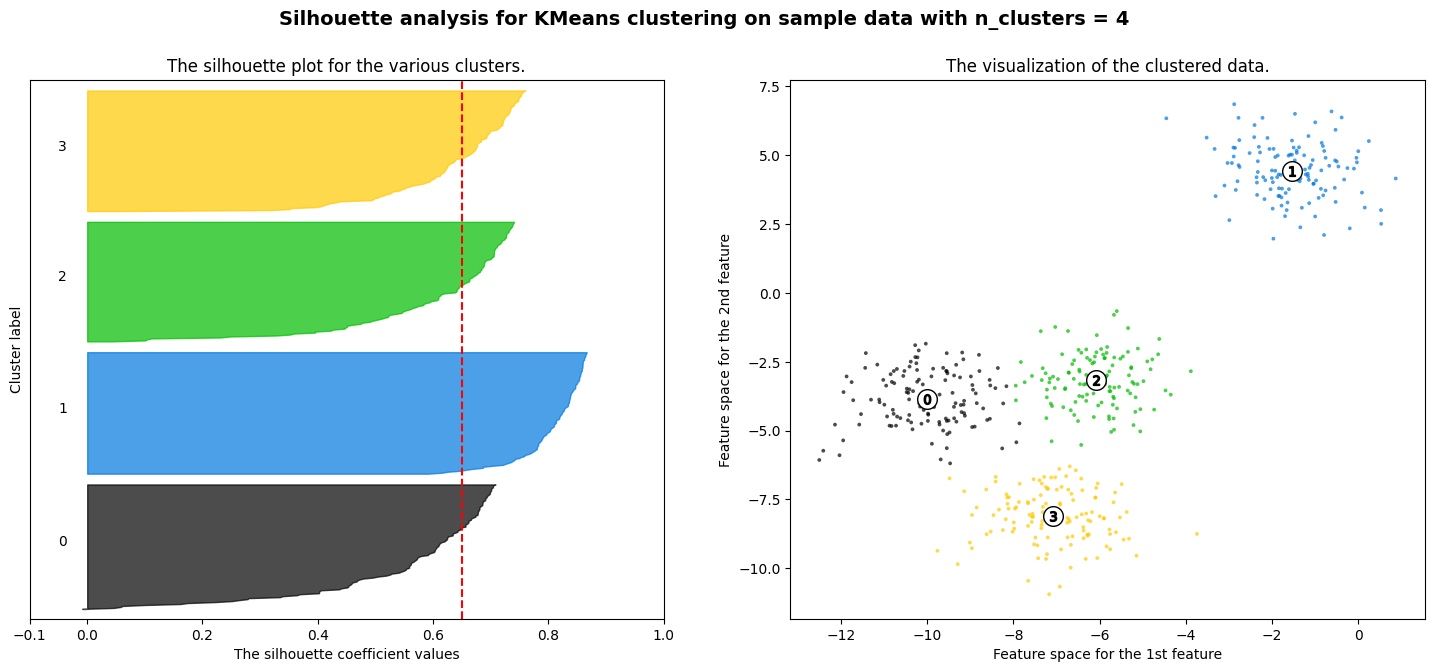

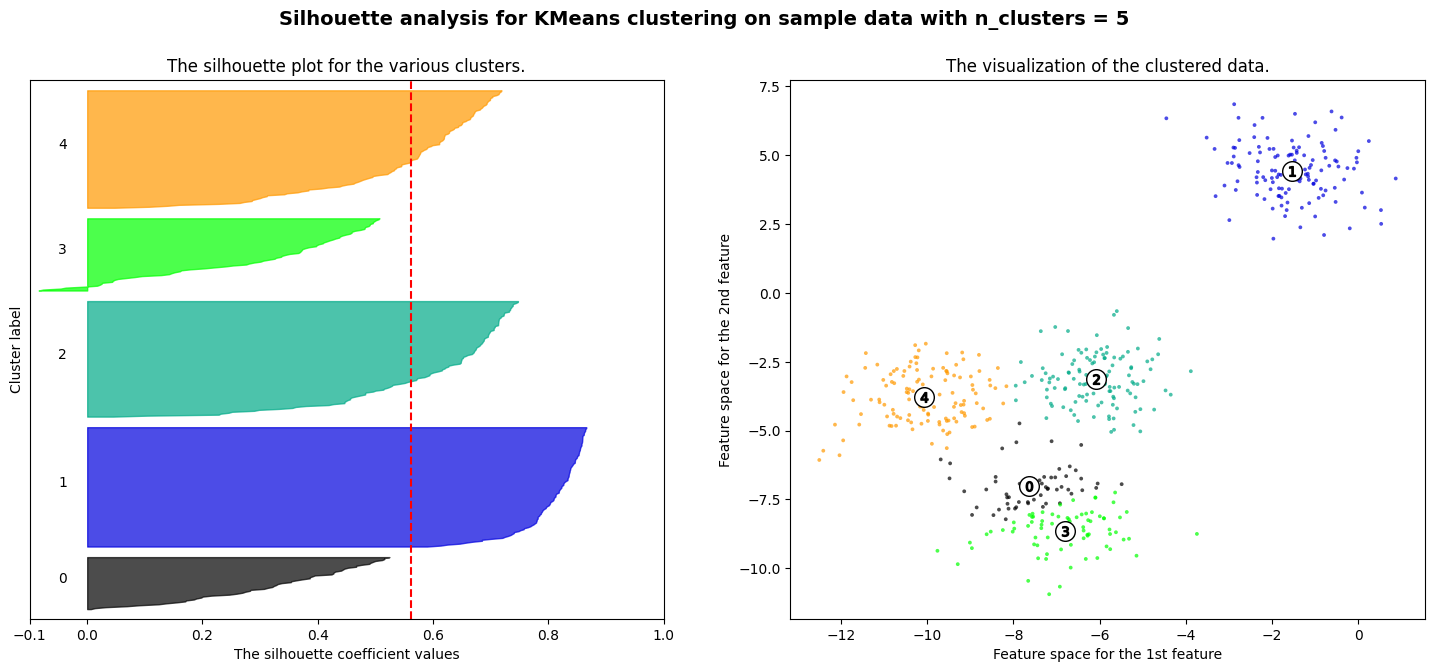

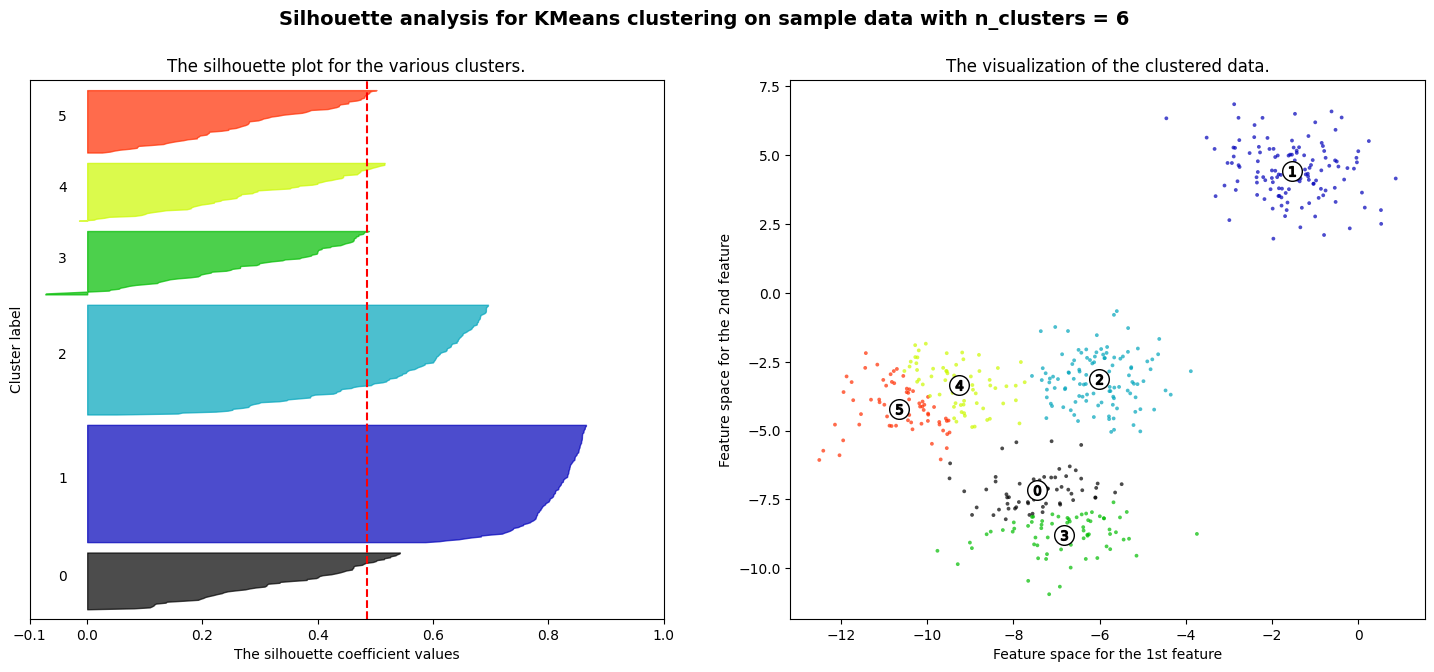

In [27]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262 

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437

For n_clusters = 5 The average silhouette_score is : 0.561464362648773

For n_clusters = 6 The average silhouette_score is : 0.4857596147013469